(1, 1000)
(2, 1)
Reservoir adjacency matrix initialized. Beginning spectral radius scaling.
The largest eigenvalue of this matrix was: 9.373340204688107
Reservoir spectral radius scaled to: 1.2500000000086582
Reservoir weights spectral radius scaling completed.


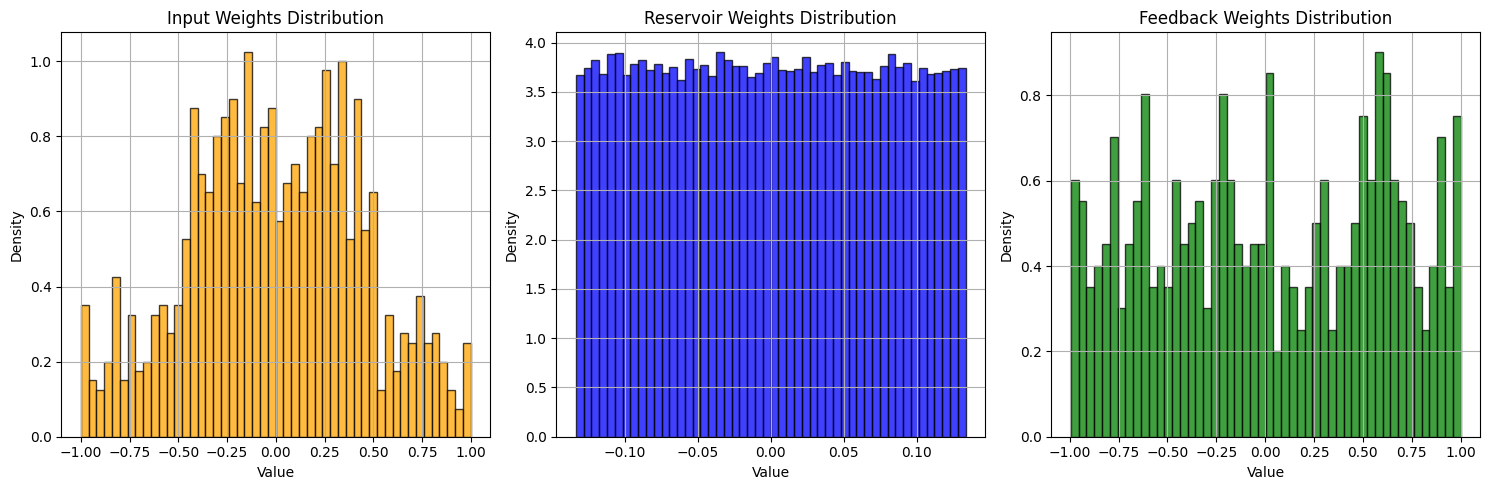


=== Matrix Shapes ===
Matrix         Shape               
-----------------------------------
W_res          (500, 500)          
W_in           (500, 2)            
W_fb           (500, 1)            
Reservoir Adjacency Matrix is of type <class 'scipy.sparse._csr.csr_matrix'> with shape (500, 500)
Network matrices uploaded to /home/dafydd/PycharmProjects/py-ESN-software-testing/Generated_Weights


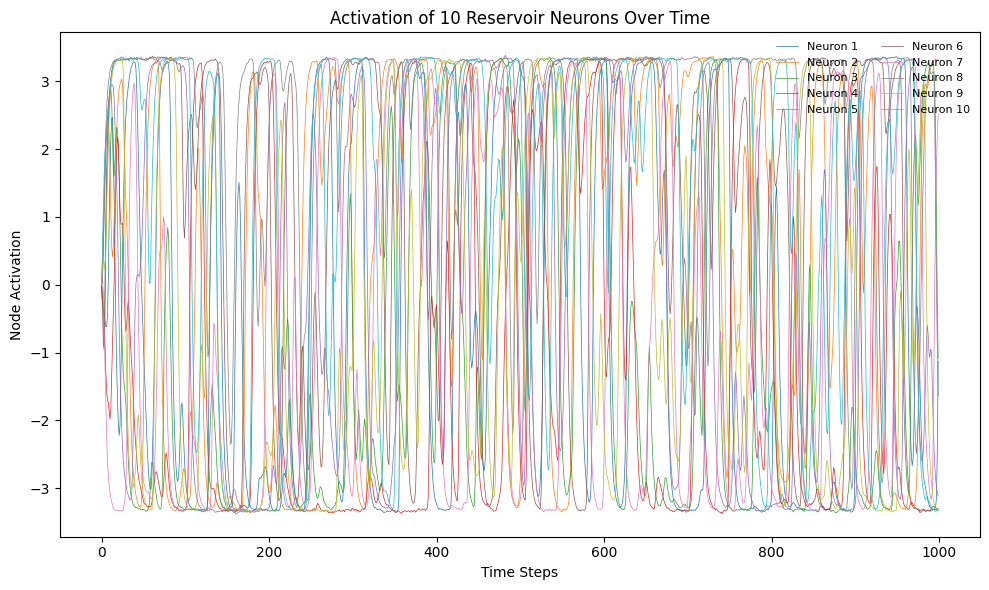

XX^T has shape: (502, 502)
YX^T has shape: (1, 502)
Readout weight matrix shape: (1, 502)


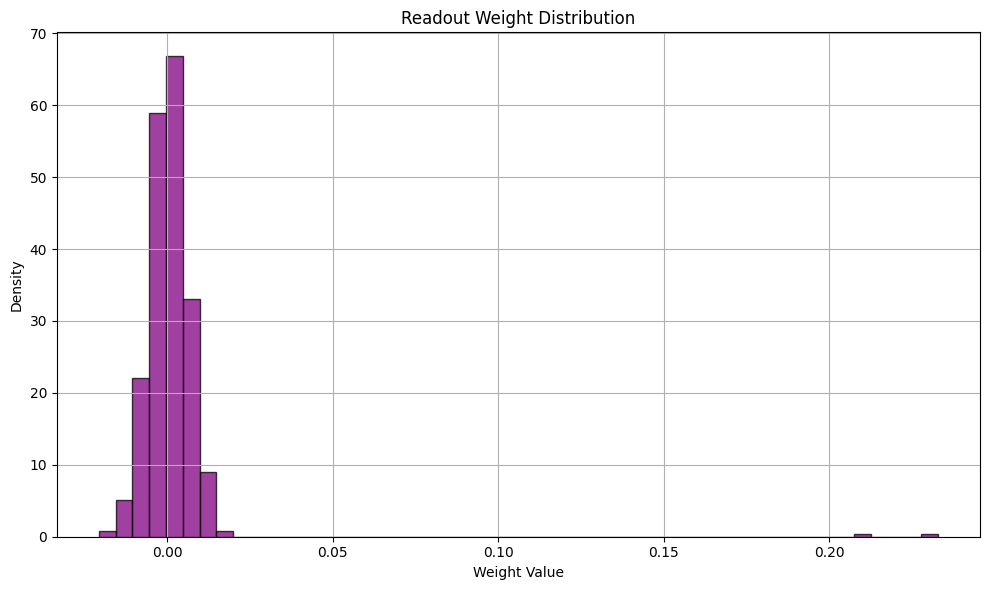

Readout weights saved to /home/dafydd/PycharmProjects/py-ESN-software-testing/Generated_Weights
Mean squared error between predictions and targets: 0.00002
Readout matrix test passed.


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from ESN_class_main import EchoStateNetwork

# Test Parameters
timesteps = 1000
input_dim = 1
output_dim = 1
reservoir_size = 500
ridge_param = 1e-2

# Generate synthetic data
np.random.seed(42)
time = np.linspace(0, 10, timesteps)
inputs = np.sin(time).reshape(1, -1)  # Sine wave input
print(inputs.shape)
targets = (0.5 * np.sin(time + np.pi / 4)).reshape(1, -1)  # Shifted and scaled sine wave

# ESN Parameters
ESN_params = {
    'input_dim': input_dim,
    'output_dim': output_dim,
    'nodes': reservoir_size,
    'leak': 0.3,
    'connectivity': 0.5,
    'input_scaling': np.array([0.5, 1]).reshape(-1, 1),
    'spectral_radius': 1.25,
    'noise': 0.01,
    'enable_feedback': True,
    'teacher_scaling': np.array([1.0]).reshape(-1, 1),
    'bias': True,
    'seed': 42,
    'distribution': 'uniform'
}

print(ESN_params['input_scaling'].shape)

# Initialize the ESN
esn = EchoStateNetwork(ESN_params, verbose=3)

# Initialize Reservoir
# esn.initialize_reservoir(distribution="normal")
esn.initialize_reservoir()

# Acquire States
states = esn.acquire_reservoir_states(inputs=inputs, teachers=targets, visualized_neurons=10)

# Perform Regression
readout_weights = esn.tikhonov_regression(burn_in=0, ridge=ridge_param)

# Validate Predictions
if esn.bias:
    augmented_state = np.vstack([np.ones((1, timesteps)), inputs, states])
else:
    augmented_state = np.vstack([inputs, states])

# Perform prediction
predicted_outputs = readout_weights @ augmented_state
prediction_error = np.mean((predicted_outputs - targets)**2)

print(f"Mean squared error between predictions and targets: {prediction_error:.5f}")

# # Save W_out if desired
# output_dir = "Generated_Weights"
# os.makedirs(output_dir, exist_ok=True)
# pd.DataFrame(readout_weights).to_csv(f"{output_dir}/W_out-{timestamp}.csv", index=False, header=False)

assert readout_weights.shape == (output_dim, int(ESN_params['bias']) + input_dim + reservoir_size), "W_out shape mismatch!"
print("Readout matrix test passed.")
# print(esn.W_out)

In [16]:
esn.W_in

array([[-0.64312104],
       [-0.90666151],
       [ 0.70151714],
       [ 0.95704358],
       [ 0.3696451 ],
       [-0.96788761],
       [ 0.35472498],
       [-0.70663362],
       [ 0.95489443],
       [ 0.15419955],
       [-0.9882808 ],
       [ 0.90557359],
       [ 0.71254712],
       [-0.37199609],
       [-0.74395602],
       [ 0.09731498],
       [ 0.95584621],
       [ 0.18747162],
       [ 0.81803345],
       [-0.92840997],
       [-0.71878445],
       [ 0.71486707],
       [-0.33487675],
       [-0.94275988],
       [-0.33962743],
       [-0.66333157],
       [ 0.00977851],
       [-0.39527299],
       [-0.57846375],
       [-0.28987975],
       [-0.03298733],
       [-0.56351609],
       [-0.27967518],
       [-0.34748209],
       [ 0.78723237],
       [-0.23185034],
       [-0.54779074],
       [-0.87310323],
       [-0.41708978],
       [ 0.98004593],
       [-0.7430505 ],
       [-0.18554876],
       [-0.1317986 ],
       [ 0.59771846],
       [ 0.89879706],
       [-0

In [17]:
output1 = esn.W_in @ (np.array([2]) * inputs[:, 1])
output1

array([-1.28750811e-02, -1.81510785e-02,  1.40441526e-02,  1.91597116e-02,
        7.40017866e-03, -1.93768057e-02,  7.10148255e-03, -1.41465830e-02,
        1.91166864e-02,  3.08702655e-03, -1.97850710e-02,  1.81292987e-02,
        1.42649693e-02, -7.44724482e-03, -1.48937657e-02,  1.94821526e-03,
        1.91357407e-02,  3.75312294e-03,  1.63767725e-02, -1.85864758e-02,
       -1.43898388e-02,  1.43114141e-02, -6.70412718e-03, -1.88737565e-02,
       -6.79923434e-03, -1.32796896e-02,  1.95762651e-04, -7.91324100e-03,
       -1.15806625e-02, -5.80330142e-03, -6.60395919e-04, -1.12814151e-02,
       -5.59900917e-03, -6.95648229e-03,  1.57601447e-02, -4.64157095e-03,
       -1.09665984e-02, -1.74792522e-02, -8.35000636e-03,  1.96202115e-02,
       -1.48756374e-02, -3.71462793e-03, -2.63856654e-03,  1.19661358e-02,
        1.79936346e-02, -1.67700590e-02,  1.51338112e-03, -1.95227318e-02,
       -1.27157233e-02, -1.24575153e-02, -1.56412245e-02, -1.03209672e-02,
        5.14238017e-03,  

In [18]:
scaled_W_in = esn.W_in * np.array([2])
scaled_W_in

array([[-1.28624208],
       [-1.81332303],
       [ 1.40303428],
       [ 1.91408716],
       [ 0.73929019],
       [-1.93577522],
       [ 0.70944995],
       [-1.41326725],
       [ 1.90978887],
       [ 0.3083991 ],
       [-1.9765616 ],
       [ 1.81114719],
       [ 1.42509423],
       [-0.74399218],
       [-1.48791205],
       [ 0.19462995],
       [ 1.91169242],
       [ 0.37494324],
       [ 1.6360669 ],
       [-1.85681994],
       [-1.4375689 ],
       [ 1.42973414],
       [-0.66975349],
       [-1.88551976],
       [-0.67925485],
       [-1.32666315],
       [ 0.01955702],
       [-0.79054598],
       [-1.1569275 ],
       [-0.57975949],
       [-0.06597465],
       [-1.12703219],
       [-0.55935036],
       [-0.69496419],
       [ 1.57446475],
       [-0.46370068],
       [-1.09558148],
       [-1.74620646],
       [-0.83417957],
       [ 1.96009186],
       [-1.486101  ],
       [-0.37109753],
       [-0.2635972 ],
       [ 1.19543693],
       [ 1.79759412],
       [-1

In [19]:
output2 = scaled_W_in @ inputs[:, 1]
output2

array([-1.28750811e-02, -1.81510785e-02,  1.40441526e-02,  1.91597116e-02,
        7.40017866e-03, -1.93768057e-02,  7.10148255e-03, -1.41465830e-02,
        1.91166864e-02,  3.08702655e-03, -1.97850710e-02,  1.81292987e-02,
        1.42649693e-02, -7.44724482e-03, -1.48937657e-02,  1.94821526e-03,
        1.91357407e-02,  3.75312294e-03,  1.63767725e-02, -1.85864758e-02,
       -1.43898388e-02,  1.43114141e-02, -6.70412718e-03, -1.88737565e-02,
       -6.79923434e-03, -1.32796896e-02,  1.95762651e-04, -7.91324100e-03,
       -1.15806625e-02, -5.80330142e-03, -6.60395919e-04, -1.12814151e-02,
       -5.59900917e-03, -6.95648229e-03,  1.57601447e-02, -4.64157095e-03,
       -1.09665984e-02, -1.74792522e-02, -8.35000636e-03,  1.96202115e-02,
       -1.48756374e-02, -3.71462793e-03, -2.63856654e-03,  1.19661358e-02,
        1.79936346e-02, -1.67700590e-02,  1.51338112e-03, -1.95227318e-02,
       -1.27157233e-02, -1.24575153e-02, -1.56412245e-02, -1.03209672e-02,
        5.14238017e-03,  

In [ ]:
esn.W_in @ (ESN_params['input_scaling'] * inputs[:, 1])

In [4]:
input_dot = esn.W_in @ np.vstack([np.ones((1, timesteps)), inputs])[:, 1]
input_dot.shape

(500,)

In [14]:
# Scaling weights
arr1 = np.array([[1, 2], [4, 5], [7, 8]])

arr2 = np.array([0.5, 2, 5]).reshape(-1, 1)

arr3 = arr1 * arr2

inputs = np.array()

print(arr1.shape)
print(arr2.shape)

print(arr3)

print(arr3 @ inputs)

(3, 2)
(3, 1)
[[ 0.5  1. ]
 [ 8.  10. ]
 [35.  40. ]]


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 3 is different from 2)

In [2]:
# import numpy as np
# from ESN_class_main import EchoStateNetwork
# 
# # Test Parameters
# ESN_params = {
#     "input_dim": 1,  # Number of inputs
#     "nodes": 500,  # Reservoir size
#     "output_dim": 1,  # Number of outputs
#     "ridge": 0.1,  # Ridge penalty
#     "leak": 0.3,  # Leaking rate
#     "connectivity": 0.1,  # Reservoir sparsity
#     "input_scaling": np.array([1.0]),  # Scaling for each input feature
#     "spectral_radius": 0.9,  # Desired spectral radius
#     "enable_feedback": True,  # Enable or disable feedback
#     "teacher_scaling": np.array([0.8]),  # Scaling for feedback
#     "bias": True,  # Include bias
#     "seed": 42,  # Random seed
#     "noise": 0.01
# }
# timesteps = 1000
# input_series = np.sin(np.linspace(0, 10 * np.pi, timesteps)).reshape(1, -1)
# print(f"Input series shape: {input_series.shape}")
# teacher_series = 0.5 * np.cos(np.linspace(0, 10 * np.pi, timesteps)).reshape(1, -1)
# print(f"Teacher series shape: {teacher_series.shape}")
# 
# # Create ESN Instance
# esn = EchoStateNetwork(ESN_params, verbose=3)
# 
# # Test Weight Initialization
# print("=== Weight Initialization Test ===")
# esn.initialize_reservoir(distribution="uniform")
# assert esn.W_res.shape == (ESN_params["nodes"], ESN_params["nodes"]), "Incorrect reservoir matrix shape"
# assert esn.W_in.shape == (ESN_params["nodes"], ESN_params["input_dim"] + ESN_params["bias"]), "Incorrect input matrix shape"
# if ESN_params["enable_feedback"]:
#     assert esn.W_fb.shape == (ESN_params["nodes"], ESN_params["output_dim"]), "Incorrect feedback matrix shape"
# print("Weight initialization test passed.\n")
# 
# # Test State Acquisition
# print("=== State Acquisition Test ===")
# states = esn.acquire_reservoir_states(input_series, teachers=teacher_series, visualized_neurons=5)
# assert states.shape == (ESN_params["nodes"], timesteps), "Incorrect state matrix shape"
# print("State acquisition test passed.\n")
# 
# # Test XX^T and YX^T Updates
# print("=== XX^T and YX^T Updates Test ===")
# expected_dim = 1 + ESN_params["input_dim"] + ESN_params["nodes"]  # Bias + Inputs + Nodes
# assert esn.XX_T.shape == (expected_dim, expected_dim), "Incorrect XX^T matrix shape"
# assert esn.YX_T.shape == (ESN_params["output_dim"], expected_dim), "Incorrect YX^T matrix shape"
# print("Matrix updates test passed.\n")
# 
# # Test Noise Injection
# print("=== Noise Injection Test ===")
# noisy_states = esn._update_no_feedback(states[:, 0:1], input_series[:, 0:1])  # Single update
# assert noisy_states.shape == (ESN_params["nodes"],), "Incorrect noisy state shape"
# print("Noise injection test passed.\n")
# 
# # Final State Check
# print("=== Final State Check ===")
# print("Reservoir states shape:", states.shape)
# print("XX^T shape:", esn.XX_T.shape)
# print("YX^T shape:", esn.YX_T.shape)